# Malarial cell classification using CNN

In [1]:
import numpy as np
import pandas as pd
import cv2
import keras
import os
from PIL import Image

In [2]:
image_directory = 'E:\Education of Coding\Data Science Coding/Deep Learning Coding/Convonutional Neural Network/Dataset/Train/'
parasite_images = os.listdir(image_directory + 'Parasite/')
uninfected_images = os.listdir(image_directory + 'Uninfected/')

In [3]:
size = 64
dataset = []
label = []

In [4]:
image_directory.split('.')[-1]

'E:\\Education of Coding\\Data Science Coding/Deep Learning Coding/Convonutional Neural Network/Dataset/Train/'

In [5]:
for i,image_name in enumerate(parasite_images):
    if (image_name.split('.')[1] == 'png'):
        image = cv2.imread(image_directory + 'Parasite/' + image_name)
        image = Image.fromarray(image , 'RGB')
        image = image.resize((size,size))
        dataset.append(np.array(image))
        label.append(0)

In [6]:
for i, image_name in enumerate(uninfected_images):
    if (image_name.split('.')[1] == 'png'):
        image = cv2.imread(image_directory + 'Uninfected/' + image_name)
        image = Image.fromarray(image , 'RGB')
        image = image.resize((size, size))
        dataset.append(np.array(image))
        label.append(1)

In [7]:
INPUT_SHAPE = (size, size, 3)
inp = keras.layers.Input(shape=INPUT_SHAPE)

conv1 = keras.layers.Conv2D(32, kernel_size = (3,3),
                           activation='relu', padding = 'same')(inp)
pool1 = keras.layers.MaxPooling2D(pool_size = (2,2))(conv1)
norm1 = keras.layers.BatchNormalization(axis = -1)(pool1)
drop1 = keras.layers.Dropout(rate=0.2)(norm1)

conv2 = keras.layers.Conv2D(32, kernel_size = (3,3), 
                           activation= 'relu', padding = 'same')(norm1)
pool2 = keras.layers.MaxPooling2D(pool_size = (2,2))(conv2)
norm2 = keras.layers.BatchNormalization(axis = -1)(pool2)
drop2 = keras.layers.Dropout(rate=0.2)(norm2)

In [8]:
flat = keras.layers.Flatten()(norm2)

In [9]:
hidden1 = keras.layers.Dense(128, activation = 'relu')(flat)
norm3 = keras.layers.BatchNormalization(axis = -1)(hidden1)
drop3 = keras.layers.Dropout(rate = 0.2)(norm3)

hidden2 = keras.layers.Dense(64, activation = 'relu')(drop3)
norm4 = keras.layers.BatchNormalization(axis = -1)(hidden2)
drop4 = keras.layers.Dropout(rate = 0.2)(norm4)

out = keras.layers.Dense(2, activation = 'sigmoid')(drop4)

In [10]:
model = keras.Model(inputs=inp, outputs=out)
model.compile(optimizer ='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0     

In [11]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(dataset, to_categorical(np.array(label)), test_size = 0.15, random_state = 0)

In [12]:
print(len(X_train),len(X_test))

353 63


In [13]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [22]:
history = model.fit(np.array(X_train),y_train, batch_size = 64,
                   verbose = 1,
                   epochs = 50,
                   validation_split = 0.1,
                   shuffle = False)

Epoch 1/50
5/5 [==============================] - 1s 171ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.4282 - val_accuracy: 0.6944
Epoch 2/50
5/5 [==============================] - 1s 162ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.1567 - val_accuracy: 0.9167
Epoch 3/50
5/5 [==============================] - 1s 161ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.2385 - val_accuracy: 0.8611
Epoch 4/50
5/5 [==============================] - 1s 162ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.1088 - val_accuracy: 0.9722
Epoch 5/50
5/5 [==============================] - 1s 161ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0227 - val_accuracy: 1.0000
Epoch 6/50
5/5 [==============================] - 1s 163ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0106 - val_accuracy: 1.0000
Epoch 7/50
5/5 [==============================] - 1s 167ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0161 - val_accuracy: 1.0000
Epoch 8/50
5/5 [====

In [23]:
print("Test_Accuracy: {:.2f}%".format(model.evaluate(np.array(X_test), np.array(y_test))[1]*100))

2/2 [==============================] - 0s 23ms/step - loss: 0.2516 - accuracy: 0.9365
Test_Accuracy: 93.65%


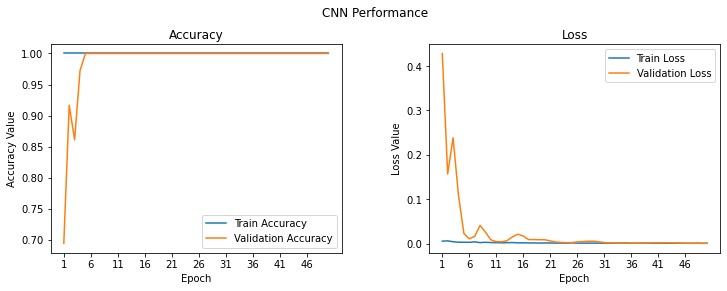

In [24]:
import matplotlib.pyplot as plt
f, (ax1 , ax2) = plt.subplots(1, 2, figsize = (12,4))
t = f.suptitle('CNN Performance', fontsize = 12)
f.subplots_adjust(top=0.85, wspace = 0.3)

max_epoch = len(history.history['accuracy'])+1
epoch_list = list(range(1, max_epoch))
ax1.plot(epoch_list, history.history['accuracy'], label = "Train Accuracy")
ax1.plot(epoch_list, history.history['val_accuracy'], label = "Validation Accuracy")
ax1.set_xticks(np.arange(1, max_epoch, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

1/1 [==============================] - 0s 20ms/step
Actual Label : 18, False Label : 12 


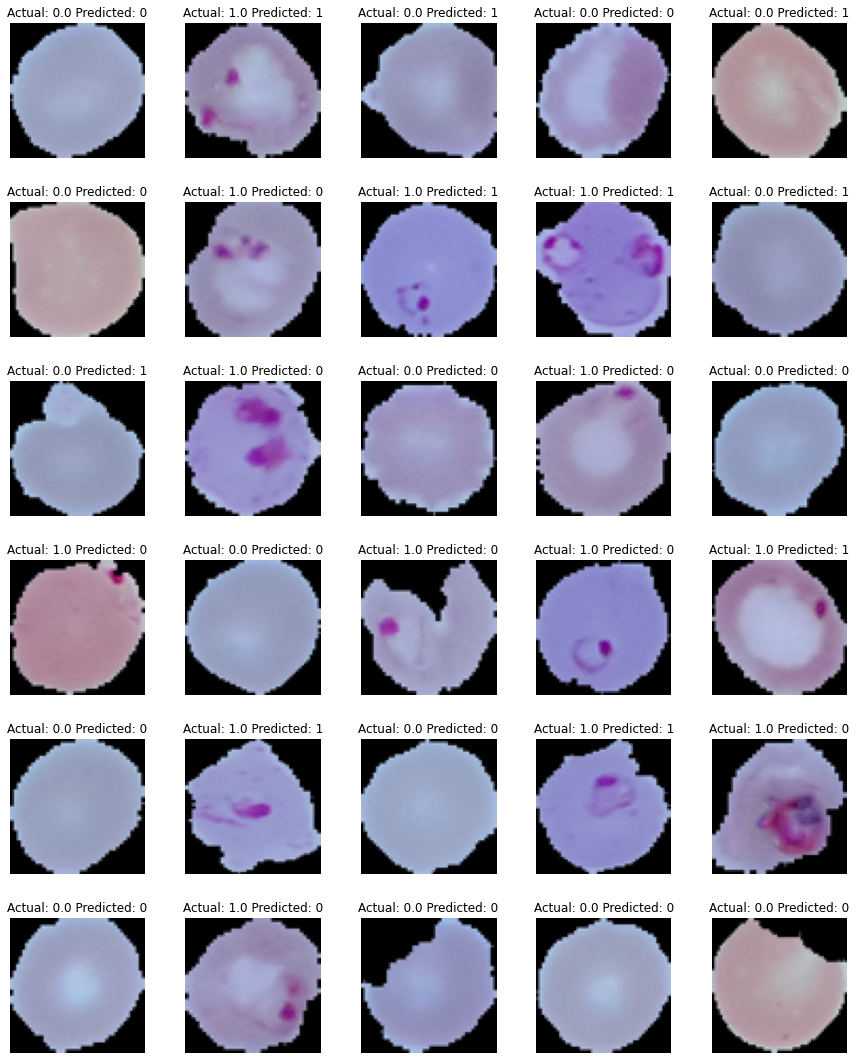

In [17]:
fig = plt.figure(figsize=(15,20))

countTrue = 0
countFalse = 0

for j in range(30):
    fig.add_subplot(6,5,j+1)
    input_img = np.expand_dims(X_test[j], axis=0)
    result = model.predict(input_img)
    plt.imshow(X_test[j])
    plt.axis('off')
    plt.title('Actual: {} Predicted: {}'.format(y_test[j][0], int(result[0][0])))
    plt.subplots_adjust(top=0.85, wspace = 0.3)
    if y_test[j][0] == int(result[0][0]):
        countTrue += 1
    else:
        countFalse += 1
        
print('Actual Label : {}, False Label : {} '.format(countTrue,countFalse))